**[1 pt]<br/> Implement Harris Corner Detection algorithm for the same input images you used in previous question.
Rather than considering the Hessian of the original image I (i.e. second-order derivatives), we use the first-order
derivatives of the smoothed version L(p, σ) for some Gaussian filter with standard deviation σ > 0.** 
<br/>
**L is obtained after smoothing I with Gaussian filter G. Now, instead of calculating those eigenvalues we
computed in previous question, we will consider the cornerness measure as<br/> **

</br>**Cornerness(p, σ, α) = Det(H 2 ) − α.Tr(H 2 ),(0.3)**<br/>

**where Det and Tr indicate the determinant and trace of the matrix H 2 , respectively. Please use non-negative
α ≈ 1/25 as a starting value and try to optimize it by trying different values and comment about it. Provide the
detected corners in the resulting output image in color.**

In [10]:
import math
from scipy import ndimage
from PIL import Image
from numpy import *
from matplotlib import pyplot as plt
from pylab import *
import time

In [11]:
# gaussian filter func
def gfilter (x,y,s): 
    gfilter = (1/(math.sqrt(2*(math.pi))*s))*exp(-((x**2) + (y**2))/2/s**2)
    return gfilter

In [12]:
#gaussian filter first derivative func
def gfilter1 (x,y,s,z): 
    if(z =='x'):
        gfilter1 = gfilter(x,y,s)*(-x/(s**2))
    elif(z=='y'):
        gfilter1 = gfilter(x,y,s)*(-y/(s**2))
    return gfilter1

In [13]:
#file - name of input image file
#size - size of the kernal size = 2(input)+1
#a - aplha, the cornerness parameter.
#t - threshold 
#s -  sigma value
def Harris(file,size,a,t,s):
    
    start = time.time()
    inp = file # input image
    I = array(Image.open(inp).convert('L')) # read the input image
    G = []
    for i in range(-2,2+1):
        G.append(gfilter(i,0,s)) # equating y to 0 for a 1D matrix
    Gx = [] #gaussian in x direction
    for i in range(-size,size+1):
        Gx.append(gfilter1(i,0,s,'x')) 
        
    Gy = [] #gaussian in y direction
    for i in range(-size,size+1):
        Gy.append([gfilter1(0,i,s,'y')]) 
    
    I1 = []
    for i in range(len(I[:,0])):
        I1.extend([convolve(I[i,:],G)]) # I*G  in x direction
    I1 = array(matrix(I1))
    I11 = I1*I1 #I11 = square from formula for harris(Lsquare X)
    
    Ix = []
    for i in range(len(I[:,0])):
        Ix.extend([convolve(I1[i,:],Gx)]) # I*G in x direction
    Ix = array(matrix(Ix))
    
    I2 = []
    for i in range(len(I[0,:])):
        I2.extend([convolve(I[:,i],G)]) # I*G in y direction
    I2 = array(matrix(transpose(I2))) 
    I22 = I2*I2 #I22 = square from formula for harris(Lsquare Y)
    
    Iy = []
    for i in range(len(I[0,:])):
        Iy.extend([convolve(I2[:,i],Gx)]) # I*G in y direction
    Iy = array(matrix(transpose(Iy))) 
    
    I12 = []
    for i in range(len(I1[:,0])):    
        temp = []
        for j in range(len(I2[0,:])):    
            temp.append(I1[i,j]*I2[i,j])
        if (j == len(I2[0,:])-1):
                I12.extend(array(matrix(temp)))
    I12 = array(matrix(I12))
    
    
    Ixy = []
    for i in range(len(I12[:,0])):
        Ixy.extend([convolve(I12[i,:],Gx)]) # I*G in x direction
    Ixy = array(matrix(Ixy))
    
    
    #store values in x,y to plot the corners
    x = [] # array x[] stores x coordinates of the corner
    y = [] # array y[] stores y coordinates of the corner
    for i in range(len(I[:,0])):
        for j in range(len(I[0,:])):
            H1 = ([Ix[i,j]**2,Ix[i,j]*Iy[i,j]],[Ix[i,j]*Iy[i,j],Iy[i,j]**2]) # Harris Matrix
            if(abs(linalg.det(H1)-(a*(trace(H1)))) > t):               
                y.append(i-5)# appending y index to mark corners
                x.append(j-5)# appending x index to mark corners
    
    plt.figure()
    plt.imshow(I,cmap = cm.gray)
    plot(x,y,'r.')
    plt.axis([5,len(I[0,:]),len(I[:,0]),5])
    show()
    return time.time() - start
    

/home/srikar/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1821: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


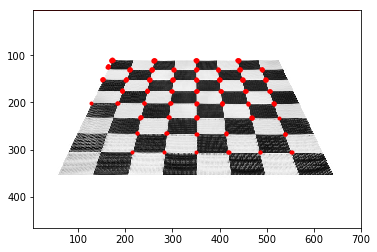

In [14]:
inp1 = Harris('/home/srikar/CVPA1/CVV/input1.png',2,.055,43.999,1.5)

/home/srikar/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1821: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


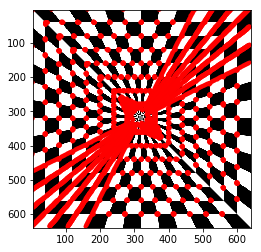

In [21]:
inp2 = Harris('/home/srikar/CVPA1/CVV/input2.png',2,.004,4.55,1.5)

/home/srikar/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1821: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


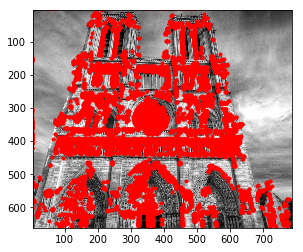

In [22]:
inp3 = Harris('/home/srikar/CVPA1/CVV/input3.png',2,.004,1,1.5)


In [24]:
print ('The Accuracy/Time to Execute is:\nInput Image 1: %.2fseconds\nInput Image 2: %.2fseconds\nInput Image 3: %.2fseconds)'%(inp1,inp2,inp3))

The Accuracy/Time to Execute is:
Input Image 1: 26.15seconds
Input Image 2: 34.14seconds
Input Image 3: 41.96seconds)


**Conclusion**
_performs better than Hessianin terms of time complexity_